# PROJECT 1: DATA ANALYSIS AND BLOG BOST

## PROJECT TOPIC: CAN PROGRAMMING BE LEARNT AT ANY AGE?

### Project Objective
Recently, technology (automation) has been the order of the day. Different industries has now begin to employ the automated way of executing business related tasks rather than the old (manual) ways of doing things. They have found it to be more efficient, not time consuming, and cost effective. Regardless of any automation process employed by these industries, there is always an element of programming behind it. People (especially older generations) are scared that programmers will be employed to take their role. Should they give up easily? Can they still delve into technology and save their career? 
This and many more will be answered using the stackoverflow 2021 survey

### Project Questions 

The following questions will be analyzed using the stackoverflow 2021 survey and python data analytics libraries:

1. What are the Top and Least 30 countries whose developers use stackoverflow?
    
2. How many of these developers use python and what is their gender break down?
    
3. At what Age with respect to their gender did they start learning Python?

In [593]:
#import python library for analysis

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [594]:
#import data to use for the analysis and save in a variable name
data_1=pd.read_csv("C:/Users/tosun/Downloads/survey_results_public.csv")
data_1.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


## EXPLORATORY DATA ANALYSIS

In [595]:
#Identify columns in the dataset
data_1.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [28]:
data_1.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [29]:
data_1.corr()

,ResponseId,CompTotal,ConvertedCompYearly
ResponseId,1.000000,-0.006689,0.004742
CompTotal,-0.006689,1.000000,0.148269
ConvertedCompYearly,0.004742,0.148269,1.000000


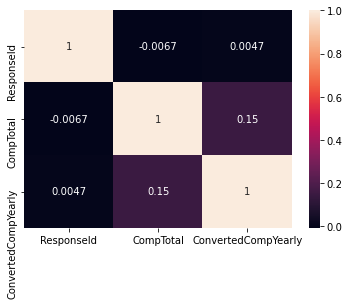

In [30]:
#heatmap showing the correlation between continous variable
cd=sns.heatmap(data=data_1.corr(), annot=True)

In [31]:
#Checking the number of rows and columns in the data
data_1.shape

(83439, 48)

In [32]:
#To find data with missing values

data_1.columns[data_1.isna().any(axis=0)]

Index(['Employment', 'US_State', 'UK_Country', 'EdLevel', 'Age1stCode',
       'LearnCode', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'Currency', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms',
       'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [33]:
#To find data with non missing values

data_1.columns[data_1.notna().all
               ()]

Index(['ResponseId', 'MainBranch', 'Country'], dtype='object')

## DATA ANALYSIS

# QUESTION 1: Countries with the highest and least developers who uses stackoverflow

### ESTIMATING THE COUNTRIES WITH THE HIGHEST DEVELOPERS WHO USES STACKOVERFLOW

In [467]:
#Total number of Countries where developers who responded to stackoverflow leaves

Total_countries= data_1['Country'].unique()
Total_countries
len(Total_countries)



181

The above analysis shows that developers from 181 countries of the world responded to stackoverflow survey. This suggest that 181 countries of the world knows about stackoverflow

In [468]:
# Top twenty Countries with the higest number of developers
developer_country_highest=(data_1['Country'].value_counts().nlargest(n=30)/data_1.shape[0])*100
developer_country_highest

United States of America                                18.322367
India                                                   12.597227
Germany                                                  6.741452
United Kingdom of Great Britain and Northern Ireland     5.363199
Canada                                                   3.609823
France                                                   3.245485
Brazil                                                   2.701375
Poland                                                   2.163257
Netherlands                                              2.123707
Italy                                                    1.996668
Australia                                                1.972699
Spain                                                    1.779743
Russian Federation                                       1.766560
Sweden                                                   1.433382
China                                                    1.264397
Turkey    

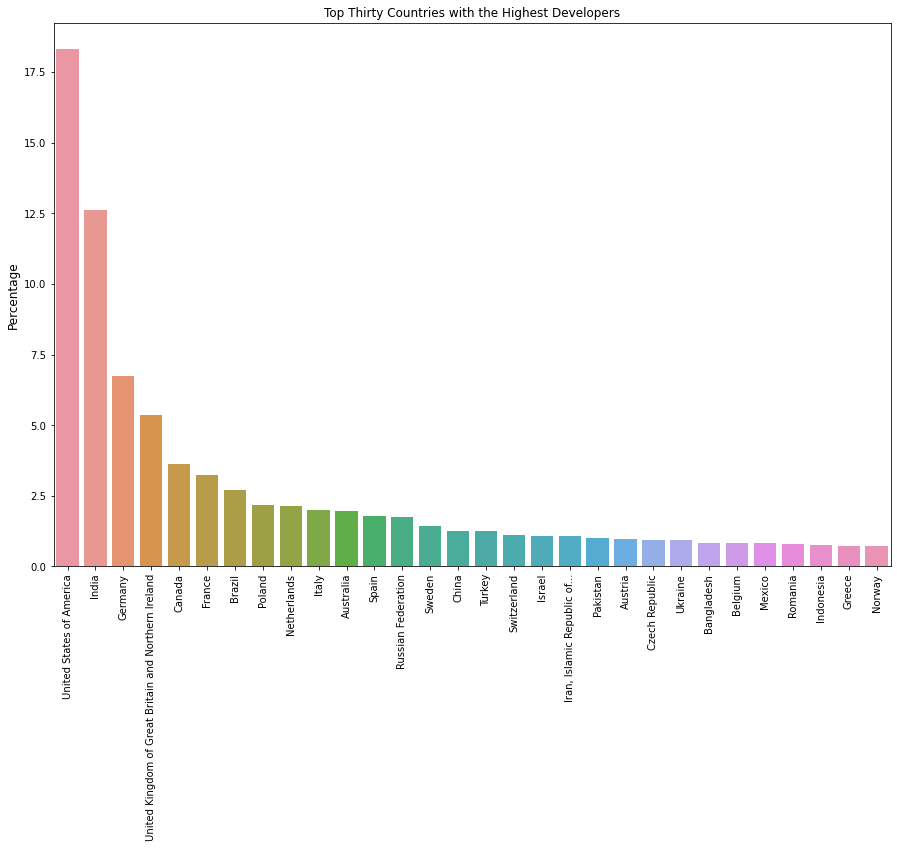

In [624]:
plt.figure(figsize=(15,10))
country_highest_plot=sns.barplot(x=data_1['Country'].value_counts().nlargest(n=30).index, y=developer_country_highest)
plt.setp(country_highest_plot.get_xticklabels(), rotation=90);
plt.title('Top Thirty Countries with the Highest Developers', fontsize=12);
plt.ylabel('Percentage', fontsize=12);

The analysis above suggest that the United States of America has the highest number of respondents (developers) that uses the stackover flow with a total respondents of 18%

### ESTIMATING THE COUNTRIES WITH THE SMALLEST DEVELOPERS WHO USES STACKOVERFLOW

In [470]:
developer_country_smallest=(data_1['Country'].value_counts().nsmallest(n=30)/data_1.shape[0])*100
developer_country_smallest


Papua New Guinea                      0.001198
Saint Vincent and the Grenadines      0.001198
Dominica                              0.001198
Brunei Darussalam                     0.001198
Tuvalu                                0.001198
Liechtenstein                         0.001198
Saint Kitts and Nevis                 0.001198
Mali                                  0.002397
Monaco                                0.002397
Micronesia, Federated States of...    0.002397
San Marino                            0.002397
Sierra Leone                          0.002397
Gambia                                0.002397
Guinea                                0.002397
Chad                                  0.002397
Saint Lucia                           0.003595
Central African Republic              0.003595
Niger                                 0.003595
Djibouti                              0.003595
Liberia                               0.003595
Fiji                                  0.004794
Lesotho      

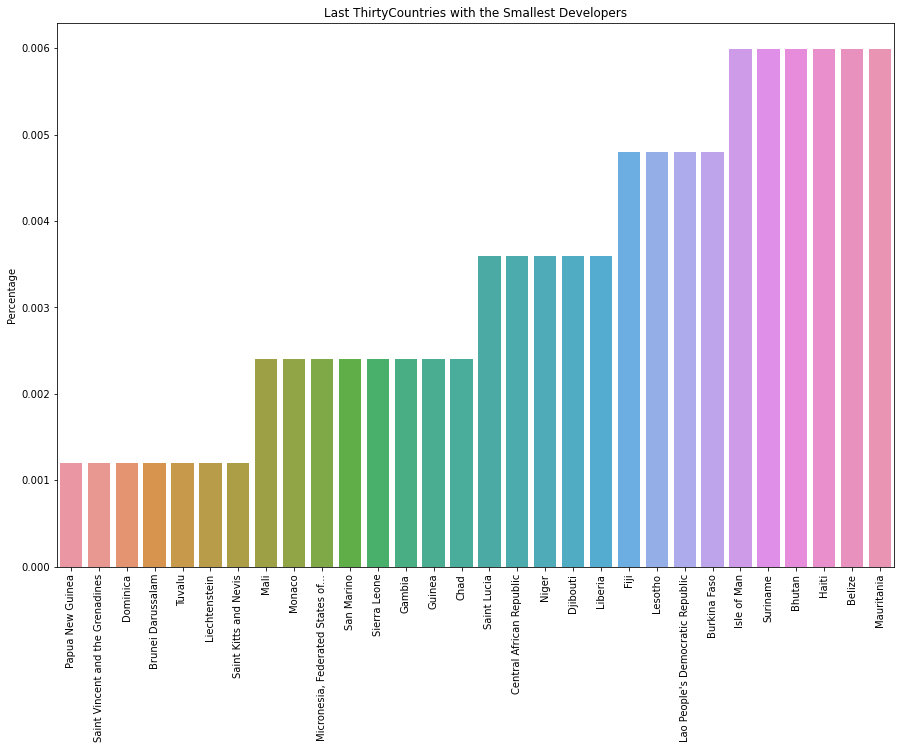

In [596]:
plt.figure(figsize=(15,10))
country_smallest_plot=sns.barplot(x=data_1['Country'].value_counts().nsmallest(n=30).index, y=developer_country_smallest)
plt.setp(country_smallest_plot.get_xticklabels(), rotation=90);
plt.title('Last ThirtyCountries with the Smallest Developers', fontsize=12);
plt.ylabel('Percentage');


The analysis above shows that the following states:

1. Papua New Guinea 
2. Saint Vincent and the Grenadines      
3. Dominica                              
4. Brunei Darussalam                    
5. Tuvalu                               
6. Liechtenstein                        
7. Saint Kitts and Nevis 
has the least percentage of developers (0.0011) that uses stackoverflow

# Question Two: Which of the Gender prefer to use python as the major programming language

In [476]:
#Top thirty countries with developers responding to stackoverflow survey

list_of_thirty_countries=list(developer_country_highest.index)

#Developer who works majorly with python
developer_language=data_1[data_1['LanguageHaveWorkedWith']=='Python']

#Top thirty countries whose developers uses python

Top_Countries_uses_python=developer_language[developer_language['Country'].isin(list_of_thirty_countries)]
Top_Countries_uses_python

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
27,28,I am a developer by profession,Employed full-time,United Kingdom of Great Britain and Northern I...,NaN,England,Bachelor’s degree,11 - 17 years,Coding Bootcamp,39,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,68507.0
102,103,I am a developer by profession,Employed full-time,Pakistan,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,7788.0
123,124,I am a developer by profession,Employed full-time,Austria,NaN,NaN,Master’s degree,18 - 24 years,Other (please specify):,12,...,25-34 years old,Man,No,NaN,NaN,NaN,NaN,Appropriate in length,Easy,59676.0
224,225,I am a developer by profession,Employed full-time,Belgium,NaN,NaN,Master’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",12,...,35-44 years old,Man,No,Prefer to self-describe:,White or of European descent,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,75669.0
337,338,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,NaN,Middle Eastern,NaN,NaN,Too long,Easy,35508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83151,83152,I code primarily as a hobby,"Student, full-time",United States of America,Indiana,NaN,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",2,...,Under 18 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,NaN
83237,83238,I am a student who is learning to code,"Student, part-time",United States of America,Florida,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",Less than 1 year,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,NaN
83239,83240,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Bachelor’s degree,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",1,...,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,"Or, in your own words:",I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN
83326,83327,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Something else,11 - 17 years,Online Courses or Certification,5,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Appropriate in length,NaN,NaN


In [477]:
#check if there is any missing value
Top_Countries_uses_python[Top_Countries_uses_python['Gender'].isnull()]

#replace missing value with the mode

Top_Countries_uses_python['Gender'] = Top_Countries_uses_python['Gender'].fillna(Top_Countries_uses_python['Gender'].mode()[0])
Top_Countries_uses_python

<ipython-input-477-d718af6bd05f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Countries_uses_python['Gender'] = Top_Countries_uses_python['Gender'].fillna(Top_Countries_uses_python['Gender'].mode()[0])


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
27,28,I am a developer by profession,Employed full-time,United Kingdom of Great Britain and Northern I...,NaN,England,Bachelor’s degree,11 - 17 years,Coding Bootcamp,39,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,68507.0
102,103,I am a developer by profession,Employed full-time,Pakistan,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,7788.0
123,124,I am a developer by profession,Employed full-time,Austria,NaN,NaN,Master’s degree,18 - 24 years,Other (please specify):,12,...,25-34 years old,Man,No,NaN,NaN,NaN,NaN,Appropriate in length,Easy,59676.0
224,225,I am a developer by profession,Employed full-time,Belgium,NaN,NaN,Master’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",12,...,35-44 years old,Man,No,Prefer to self-describe:,White or of European descent,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,75669.0
337,338,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,NaN,Middle Eastern,NaN,NaN,Too long,Easy,35508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83151,83152,I code primarily as a hobby,"Student, full-time",United States of America,Indiana,NaN,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",2,...,Under 18 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,NaN
83237,83238,I am a student who is learning to code,"Student, part-time",United States of America,Florida,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",Less than 1 year,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,NaN
83239,83240,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Bachelor’s degree,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",1,...,Under 18 years old,Man,No,Straight / Heterosexual,White or of European descent,"Or, in your own words:",I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN
83326,83327,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Something else,11 - 17 years,Online Courses or Certification,5,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Appropriate in length,NaN,NaN


In [478]:

#Gender usage of python
Top_Countries_uses_python['Gender'].value_counts()



Man                                                                         983
Woman                                                                        67
Prefer not to say                                                            23
Non-binary, genderqueer, or gender non-conforming                            10
Or, in your own words:                                                        9
Man;Or, in your own words:                                                    2
Woman;Non-binary, genderqueer, or gender non-conforming                       1
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:      1
Name: Gender, dtype: int64

In [605]:
#Grouping Gender into four major categories
'''
The function below is used to recategorized the developer's gender
into four major categories using the gender column as input 
   
'''
def group_Gender(sex):
    if sex == 'Man' or sex == 'Man;Or, in your own words':
        return 'MALE'
    elif sex == 'Woman':
        return 'FEMALE'
    elif sex =='Non-binary, genderqueer, or gender non-conforming' or sex =='Woman;Non-binary, genderqueer, or gender non-conforming' or sex == 'Non-binary, genderqueer, or gender non-conforming;Or, in your own words':
        return 'TRANSGENDER'
    else:
        return 'NOTSURE'
    
    
Top_Countries_uses_python['GENDER_NEW']=Top_Countries_uses_python['Gender'].apply(group_Gender)


Top_Countries_uses_python

<ipython-input-605-02412dc540f5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Countries_uses_python['GENDER_NEW']=Top_Countries_uses_python['Gender'].apply(group_Gender)


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,GENDER_NEW,Age_NEW
27,28,I am a developer by profession,Employed full-time,United Kingdom of Great Britain and Northern I...,NaN,England,Bachelor’s degree,11 - 17 years,Coding Bootcamp,39,...,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,68507.0,MALE,Tenager
102,103,I am a developer by profession,Employed full-time,Pakistan,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,7788.0,MALE,Young Adult
123,124,I am a developer by profession,Employed full-time,Austria,NaN,NaN,Master’s degree,18 - 24 years,Other (please specify):,12,...,No,NaN,NaN,NaN,NaN,Appropriate in length,Easy,59676.0,MALE,Young Adult
224,225,I am a developer by profession,Employed full-time,Belgium,NaN,NaN,Master’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",12,...,No,Prefer to self-describe:,White or of European descent,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,75669.0,MALE,Young Adult
337,338,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,No,NaN,Middle Eastern,NaN,NaN,Too long,Easy,35508.0,MALE,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83151,83152,I code primarily as a hobby,"Student, full-time",United States of America,Indiana,NaN,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",2,...,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,NaN,MALE,Tenager
83237,83238,I am a student who is learning to code,"Student, part-time",United States of America,Florida,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",Less than 1 year,...,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,NaN,MALE,Young Adult
83239,83240,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Bachelor’s degree,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",1,...,No,Straight / Heterosexual,White or of European descent,"Or, in your own words:",I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN,MALE,Tenager
83326,83327,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Something else,11 - 17 years,Online Courses or Certification,5,...,No,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Appropriate in length,NaN,NaN,MALE,Tenager


In [606]:
Gender_recategorized=(Top_Countries_uses_python['GENDER_NEW'].value_counts())/Top_Countries_uses_python.shape[0]
Gender_recategorized

MALE           0.896898
FEMALE         0.061131
NOTSURE        0.031934
TRANSGENDER    0.010036
Name: GENDER_NEW, dtype: float64

The gender of the developers who likes to work with python was re-categorized majorly into four different genders. They are:

1. MALE
2. FEMALE
3. TRANSGENDER
4. NOTSURE

The results above indicate that majority of developers who uses python to code are male (89.6%) followed by female (6.1%)

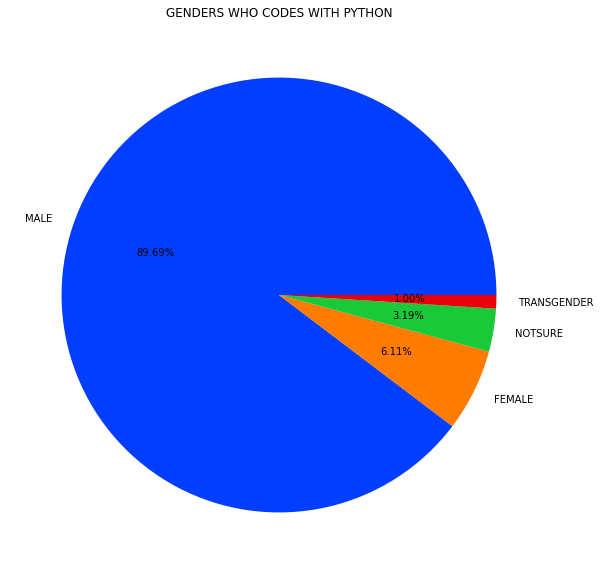

In [607]:
plt.figure(figsize=(15,10))

colors = sns.color_palette('bright')[0:5]

plt.pie(Gender_recategorized, labels =Gender_recategorized.index, autopct='%.2f%%', normalize=False, colors=colors)


plt.title('GENDERS WHO CODES WITH PYTHON', fontsize=12);



# Question Three: What age bracket with respect to gender did they first attempt coding with python?

In [608]:
#check if there is any missing value
Top_Countries_uses_python[Top_Countries_uses_python['Age1stCode'].isnull()]

#replace missing value with the mode

Top_Countries_uses_python['Age1stCode'] = Top_Countries_uses_python['Age1stCode'].fillna(Top_Countries_uses_python['Age1stCode'].mode()[0])
Top_Countries_uses_python




#Age of first attempting to code withpython
Top_Countries_uses_python['Age1stCode'].value_counts()

<ipython-input-608-9ce75ceccabc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Countries_uses_python['Age1stCode'] = Top_Countries_uses_python['Age1stCode'].fillna(Top_Countries_uses_python['Age1stCode'].mode()[0])


11 - 17 years           559
18 - 24 years           297
5 - 10 years            136
25 - 34 years            58
35 - 44 years            21
45 - 54 years            12
Younger than 5 years      9
Older than 64 years       2
55 - 64 years             2
Name: Age1stCode, dtype: int64

In [613]:
#Reclassifying  Age1stCode into five major categories
'''
The function below is used to recategorized the developer's Age
into five major categories using the gender column as input 
   
'''



def group_Age(Age):
    if Age == 'Younger than 5 years' or Age == '5 - 10 years':
            return 'Children'
    elif Age == '11 - 17 years':
        return 'Tenager'
    elif Age == '18 - 24 years' or Age == '25 - 34 years':
        return 'Young Adult'
    elif Age == '35 - 44 years' or Age == '45 - 54 years':
        return 'Middle Aged Adult'
    elif Age == '55 - 64 years':
        return 'Adult'
    else:
        return 'Old'
    
    
Top_Countries_uses_python['Age_NEW']=Top_Countries_uses_python['Age1stCode'].apply(group_Age)

Top_Countries_uses_python


<ipython-input-613-bd14f78e93f4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_Countries_uses_python['Age_NEW']=Top_Countries_uses_python['Age1stCode'].apply(group_Age)


,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly,GENDER_NEW,Age_NEW
27,28,I am a developer by profession,Employed full-time,United Kingdom of Great Britain and Northern I...,NaN,England,Bachelor’s degree,11 - 17 years,Coding Bootcamp,39,...,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,68507.0,MALE,Tenager
102,103,I am a developer by profession,Employed full-time,Pakistan,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,7788.0,MALE,Young Adult
123,124,I am a developer by profession,Employed full-time,Austria,NaN,NaN,Master’s degree,18 - 24 years,Other (please specify):,12,...,No,NaN,NaN,NaN,NaN,Appropriate in length,Easy,59676.0,MALE,Young Adult
224,225,I am a developer by profession,Employed full-time,Belgium,NaN,NaN,Master’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc)",12,...,No,Prefer to self-describe:,White or of European descent,NaN,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,75669.0,MALE,Young Adult
337,338,I am a developer by profession,Employed full-time,Turkey,NaN,NaN,Bachelor’s degree,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",4,...,No,NaN,Middle Eastern,NaN,NaN,Too long,Easy,35508.0,MALE,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83151,83152,I code primarily as a hobby,"Student, full-time",United States of America,Indiana,NaN,Primary/elementary school,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",2,...,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,NaN,MALE,Tenager
83237,83238,I am a student who is learning to code,"Student, part-time",United States of America,Florida,NaN,Some college/university study without earning ...,18 - 24 years,"Other online resources (ex: videos, blogs, etc...",Less than 1 year,...,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,NaN,MALE,Young Adult
83239,83240,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Bachelor’s degree,11 - 17 years,"Other online resources (ex: videos, blogs, etc...",1,...,No,Straight / Heterosexual,White or of European descent,"Or, in your own words:",I have an anxiety disorder,Appropriate in length,Neither easy nor difficult,NaN,MALE,Tenager
83326,83327,I am a student who is learning to code,"Student, full-time",France,NaN,NaN,Something else,11 - 17 years,Online Courses or Certification,5,...,No,Prefer not to say,Prefer not to say,Prefer not to say,Prefer not to say,Appropriate in length,NaN,NaN,MALE,Tenager


In [620]:
#Age brackets of first coding with python

Age_bracket=Top_Countries_uses_python['Age_NEW'].value_counts()/Top_Countries_uses_python.shape[0]
Age_bracket


Tenager              0.510036
Young Adult          0.323905
Children             0.132299
Middle Aged Adult    0.030109
Old                  0.001825
Adult                0.001825
Name: Age_NEW, dtype: float64

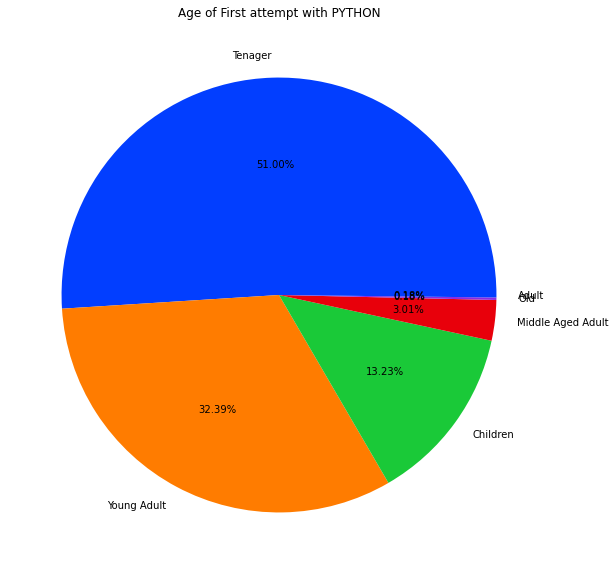

In [621]:
plt.figure(figsize=(15,10))

colors = sns.color_palette('bright')[0:5]

plt.pie(Age_bracket, labels =Age_bracket.index, autopct='%.2f%%', normalize=False, colors=colors)


plt.title('Age of First attempt with PYTHON', fontsize=12);

From the study above, 51% developers attempted coding with python for the first time when they were **Tenagers** whle 32% developers attempted coding with python for the first time during their **Youthful days** while 0.18% attempted coding with this language at a **very old Age**

In [623]:
#determing the total number of developers that coded with python for the first time with respect to their age
Top_Countries_uses_python_Age_Gender= Top_Countries_uses_python.groupby(['Age_NEW', 'GENDER_NEW'], as_index=False)['ResponseId'].count()
Top_Countries_uses_python_Age_Gender


,Age_NEW,GENDER_NEW,ResponseId
0,Adult,MALE,2
1,Children,FEMALE,8
2,Children,MALE,125
3,Children,NOTSURE,10
4,Children,TRANSGENDER,2
5,Middle Aged Adult,FEMALE,3
6,Middle Aged Adult,MALE,30
7,Old,MALE,2
8,Tenager,FEMALE,31
9,Tenager,MALE,503


The analysis above indicate the number of developers that code with python on their first attempt with respect to gender. In each categories (Adult, Children, Middle Aged Adult, Teenagers, etc), more men attempted coding for the first time with python. Also, the analysis suggest that age isnt a barrier when delving into tech.

In [616]:
#determing persentage of individual respondent per gender

Response_Age_New= Top_Countries_uses_python['Age_NEW'].value_counts()


Top_Countries_uses_python_Age_Gender['Percentage_of_Response']= Top_Countries_uses_python_Age_Gender.apply(lambda x: x['ResponseId']/Response_Age_New[x['Age_NEW']], axis=1)

Top_Countries_uses_python_Age_Gender


,Age_NEW,GENDER_NEW,ResponseId,Percentage_of_Response
0,Adult,MALE,2,1.000000
1,Children,FEMALE,8,0.055172
2,Children,MALE,125,0.862069
3,Children,NOTSURE,10,0.068966
4,Children,TRANSGENDER,2,0.013793
5,Middle Aged Adult,FEMALE,3,0.090909
6,Middle Aged Adult,MALE,30,0.909091
7,Old,MALE,2,1.000000
8,Tenager,FEMALE,31,0.055456
9,Tenager,MALE,503,0.899821


In [617]:
#Creating a pivot table

PV_T=pd.pivot_table(Top_Countries_uses_python_Age_Gender, values='Percentage_of_Response', index='Age_NEW', columns='GENDER_NEW')
PV_T

GENDER_NEW,FEMALE,MALE,NOTSURE,TRANSGENDER
Age_NEW,,,,
Adult,NaN,1.000000,NaN,NaN
Children,0.055172,0.862069,0.068966,0.013793
Middle Aged Adult,0.090909,0.909091,NaN,NaN
Old,NaN,1.000000,NaN,NaN
Tenager,0.055456,0.899821,0.032200,0.012522
Young Adult,0.070423,0.904225,0.019718,0.005634


In [618]:
#filling the missing values with the mean


PV_T[['FEMALE','NOTSURE', 'TRANSGENDER' ]] = PV_T[['FEMALE','NOTSURE', 'TRANSGENDER' ]].fillna(PV_T[['FEMALE','NOTSURE', 'TRANSGENDER' ]].mean()[0])
PV_T

GENDER_NEW,FEMALE,MALE,NOTSURE,TRANSGENDER
Age_NEW,,,,
Adult,0.067990,1.000000,0.067990,0.067990
Children,0.055172,0.862069,0.068966,0.013793
Middle Aged Adult,0.090909,0.909091,0.067990,0.067990
Old,0.067990,1.000000,0.067990,0.067990
Tenager,0.055456,0.899821,0.032200,0.012522
Young Adult,0.070423,0.904225,0.019718,0.005634


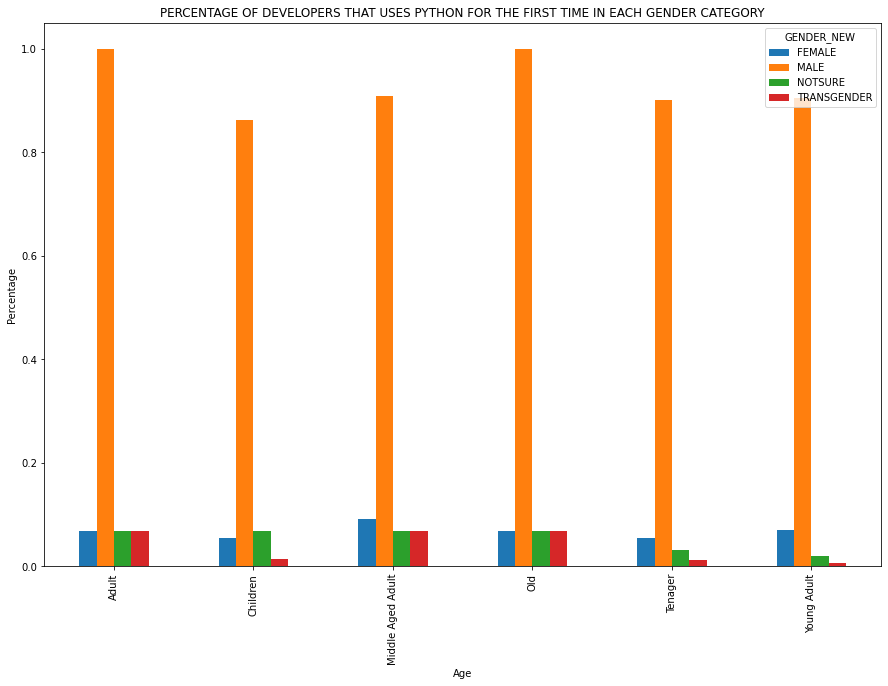

In [619]:
#Visualizing the pivot table

PV_T.plot(kind='bar', figsize=(15,10));
plt.xlabel('Age')
plt.title('PERCENTAGE OF DEVELOPERS THAT USES PYTHON FOR THE FIRST TIME IN EACH GENDER CATEGORY', fontsize=12);
plt.ylabel('Percentage');

###  CONCLUSION

From the whole analysis performed on Stack Overflow 2021 survey, the following conclusion was reached: 

1. **The United States of America** has the higest number of developers that uses stackoverflow with a percentage of 18%. This is followed closely by **India** with a percentage of 12%.
            
2. **Papua New Guinea** including six different countries has the lowest number of developers that uses stack overflow. 
         
3. From the top thirty countries considered during this analysis, **1096** developers enjoys coding with **Python**. **89%** are men, **6%** are women, **1%** are trangender, and **3%** are not sure of their gender. In genereal, **Men** prefer to code with pyton in these countries.

4. **51%** attempted coding with python for the first time when they were a teenager, **32%** attempted python for the first time whey they were at the young adulthood stage and, **0.018%** attempted coding with python at old age.
 
In conclusion, irrespective of age or gender delving into technology is possible.


### FURTHER ANALYSIS


1. How many years have they coded for?
2. Are they interested in coding with other languages?
3. Baye Naive Analyis: how much did they like coding with python with respect to other language
4. What platform do they enjoy coding with?